In [2]:
%load_ext autoreload
%autoreload 2

import torch
import default_config
import matplotlib.pyplot as plt
import numpy as np

from datasets.utils import load as load_data
from scipy.signal import savgol_filter as sg

INFO: Using pytorch backend


### Load Experimental Data + Smooth

INFO: # - Found file at data/expt34_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/expt34_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/expt34_labels_timestep1000000.txt! Loading...


      Unnamed: 0         times      angles  velocities  gains
0              0  3.625397e+08  125.815085   -0.104195    1.0
1              1  3.635397e+08  129.515412   13.455259    1.0
2              2  3.645397e+08  154.552048   30.988614    1.0
3              3  3.655397e+08  184.048601   27.353089    1.0
4              4  3.665397e+08  212.071814   28.240268    1.0
...          ...           ...         ...         ...    ...
2948        2948  3.310540e+09   37.660339    0.094720    1.0
2949        2949  3.311540e+09   38.190007    1.087265    1.0
2950        2950  3.312540e+09   38.595808   -1.100449    1.0
2951        2951  3.313540e+09   46.685671   16.660279    1.0
2952        2952  3.314540e+09   54.966355    1.060331    1.0

[2953 rows x 5 columns]
Dataset shape: (1473, 40).


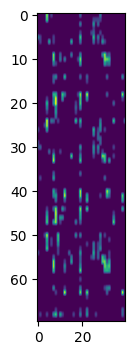

In [37]:
data, labels, train_loader, test_loader = load_data(default_config)

fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(data[0:70,:],aspect=2)

### Pullback metric

### Load place cell data, expt 41

In [47]:
from datasets.experimental import load_place_cells 

place_cells, labels = load_place_cells(expt_id=41, timestep_microsec=int(1e6))
print(place_cells.shape)

INFO: # - Found file at /home/facosta/code/neuralgeom/neuralgeom/data/expt41_times_timestep1000000.txt! Loading...
INFO: # - Found file at /home/facosta/code/neuralgeom/neuralgeom/data/expt41_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at /home/facosta/code/neuralgeom/neuralgeom/data/expt41_labels_timestep1000000.txt! Loading...


(3882, 12)


### Filter by gain

In [48]:
dataset = place_cells[labels["velocities"] > 5]

labels = labels[labels["velocities"] > 5]

In [49]:
dataset_1 = dataset[labels["gains"] == 1.0]
labels_1 = labels[labels["gains"] == 1.0]

In [51]:
dataset_2 = dataset[labels["gains"] == 1.768999993801117]
labels_2 = labels[labels["gains"] == 1.768999993801117]

### Filter by velocities

In [8]:
dataset = place_cells[labels["velocities"] > 10]

labels = labels[labels["velocities"] > 10]

### PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(data)
print(sum(pca.explained_variance_ratio_))
A = torch.tensor(pca.fit_transform(data))

In [ ]:
U, S, V = torch.pca_lowrank(data, q = 8, center=True)